In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [3]:
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

In [4]:
scale_factor = 1000.0

# Scale the training set's label.
train_df["median_house_value"] /= scale_factor 

# Scale the test set's label
test_df["median_house_value"] /= scale_factor

In [5]:
def build_model(my_learning_rate):
    """Create and compile a simple linear regression model."""
    # Most simple tf.keras models are sequential.
    model = tf.keras.models.Sequential()

    # Add one linear layer to the model to yield a simple linear regressor.
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

    # Compile the model topography into code that TensorFlow can efficiently
    # execute. Configure training to minimize the model's mean squared error. 
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                  loss="mean_squared_error",
                  metrics=[tf.keras.metrics.RootMeanSquaredError()])

    return model               


def train_model(model, df, feature, label, my_epochs, 
    my_batch_size=None, my_validation_split=0.1):
    """Feed a dataset into the model in order to train it."""

    history = model.fit(x=df[feature], y=df[label], batch_size=my_batch_size,
                        epochs=my_epochs, validation_split=my_validation_split)

    # Gather the model's trained weight and bias.
    trained_weight = model.get_weights()[0]
    trained_bias = model.get_weights()[1]

    # The list of epochs is stored separately from the 
    # rest of history.
    epochs = history.epoch

    # Isolate the root mean squared error for each epoch.
    hist = pd.DataFrame(history.history)
    rmse = hist["root_mean_squared_error"]

    return epochs, rmse, history.history   

print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


In [6]:
def plot_the_loss_curve(epochs, mae_training, mae_validation):
    """Plot a curve of loss vs. epoch."""

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")

    plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
    plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
    plt.legend()

    # We're not going to plot the first epoch, since the loss on the first epoch
    # is often substantially greater than the loss for other epochs.
    merged_mae_lists = mae_training[1:] + mae_validation[1:]
    highest_loss = max(merged_mae_lists)
    lowest_loss = min(merged_mae_lists)
    delta = highest_loss - lowest_loss
    print(delta)

    top_of_y_axis = highest_loss + (delta * 0.05)
    bottom_of_y_axis = lowest_loss - (delta * 0.05)

    plt.ylim([bottom_of_y_axis, top_of_y_axis])
    plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


Train on 1699 samples, validate on 15301 samples
Epoch 1/30
1699/1699 [==============================] - 0s 238us/sample - loss: 29869.3716 - root_mean_squared_error: 172.8276 - val_loss: 54182.6703 - val_root_mean_squared_error: 232.7717
Epoch 2/30
1699/1699 [==============================] - 0s 81us/sample - loss: 27520.6188 - root_mean_squared_error: 165.8934 - val_loss: 51090.9269 - val_root_mean_squared_error: 226.0330
Epoch 3/30
1699/1699 [==============================] - 0s 79us/sample - loss: 25574.7576 - root_mean_squared_error: 159.9211 - val_loss: 48192.1067 - val_root_mean_squared_error: 219.5270
Epoch 4/30
1699/1699 [==============================] - 0s 84us/sample - loss: 23734.7274 - root_mean_squared_error: 154.0608 - val_loss: 45395.0084 - val_root_mean_squared_error: 213.0610
Epoch 5/30
1699/1699 [==============================] - 0s 90us/sample - loss: 21978.6970 - root_mean_squared_error: 148.2521 - val_loss: 42716.7670 - val_root_mean_squared_error: 206.6804
Epoch

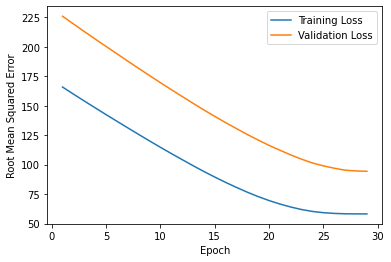

In [7]:
# The following variables are the hyperparameters.
learning_rate = 0.08
epochs = 30
batch_size = 100

# Split the original training set into a reduced training set and a
# validation set. 
validation_split=0.9

# Identify the feature and the label.
my_feature="median_income"  # the median income on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on the neighborhood's median income.  

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions to build and train the model.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, train_df, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

In [8]:
train_df.head(50)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5
...,...,...,...,...,...,...,...,...,...
45,-115.5,32.7,35.0,2159.0,492.0,1694.0,475.0,2.2,75.5
46,-115.5,33.2,32.0,1995.0,523.0,1069.0,410.0,1.7,43.3
47,-115.5,33.1,21.0,1024.0,218.0,890.0,232.0,2.1,46.7
48,-115.5,33.0,20.0,1402.0,287.0,1104.0,317.0,1.9,63.7


In [9]:
# df = train_df.sample(frac=1).reset_index(drop=True)
shuffled_train_df = train_df.reindex(np.random.permutation(train_df.index))

Train on 11900 samples, validate on 5100 samples
Epoch 1/30
11900/11900 [==============================] - 0s 31us/sample - loss: 43417.7482 - root_mean_squared_error: 208.3692 - val_loss: 33967.5002 - val_root_mean_squared_error: 184.3027
Epoch 2/30
11900/11900 [==============================] - 0s 13us/sample - loss: 27239.9646 - root_mean_squared_error: 165.0453 - val_loss: 20448.6407 - val_root_mean_squared_error: 142.9987
Epoch 3/30
11900/11900 [==============================] - 0s 13us/sample - loss: 15925.4444 - root_mean_squared_error: 126.1961 - val_loss: 11697.9762 - val_root_mean_squared_error: 108.1572
Epoch 4/30
11900/11900 [==============================] - 0s 12us/sample - loss: 9384.4996 - root_mean_squared_error: 96.8736 - val_loss: 7539.6875 - val_root_mean_squared_error: 86.8314
Epoch 5/30
11900/11900 [==============================] - 0s 12us/sample - loss: 7155.7043 - root_mean_squared_error: 84.5914 - val_loss: 6979.3356 - val_root_mean_squared_error: 83.5424
Epoc

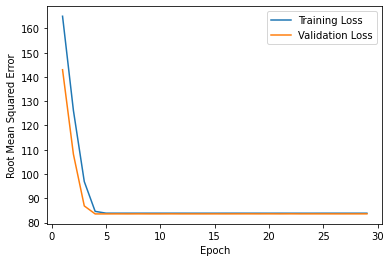

In [10]:
# The following variables are the hyperparameters.
learning_rate = 0.08
epochs = 30
batch_size = 100

# Split the original training set into a reduced training set and a
# validation set. 
validation_split=0.3

# Identify the feature and the label.
my_feature="median_income"  # the median income on a specific city block.
my_label="median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on the neighborhood's median income.  

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions to build and train the model.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, shuffled_train_df, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

In [11]:
x_test = test_df[my_feature]
y_test = test_df[my_label]

results = my_model.evaluate(x_test, y_test, batch_size=batch_size)

3000/3000 [==============================] - 0s 7us/sample - loss: 7007.1397 - root_mean_squared_error: 83.7087
